In [1]:
# ===============================
# Step 0: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot readability
plt.style.use('seaborn-v0_8')
sns.set_context('talk')  # bigger labels


# NYC Motor Vehicle Collisions - Exploratory Data Analysis (EDA)

This notebook explores two datasets from NYC Open Data:
1. Crashes dataset (`df_crashes`)
2. Persons dataset (`df_persons`)

We aim to:
- Understand dataset structure and issues
- Check missing values, duplicates, and data types
- Perform initial visualizations

In [2]:
# ===============================
# Step 1: Load Datasets
# ===============================

# Crashes dataset
crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"
df_crashes = pd.read_csv(crashes_url, low_memory=False)

# Persons dataset
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=DOWNLOAD"
df_persons = pd.read_csv(persons_url, low_memory=False)

# Quick preview
print("Crashes dataset head:")
display(df_crashes.head())
print("\nPersons dataset head:")
display(df_persons.head())


Crashes dataset head:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN



Persons dataset head:


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [3]:
# ===============================
# Step 2: Dataset Info and Size
# ===============================

# Shapes
print("Crashes dataset shape:", df_crashes.shape)
print("Persons dataset shape:", df_persons.shape)

# Column types
print("\nCrashes dataset info:")
df_crashes.info()

print("\nPersons dataset info:")
df_persons.info()


Crashes dataset shape: (2221796, 29)
Persons dataset shape: (5824319, 21)

Crashes dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221796 entries, 0 to 2221795
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64 

In [4]:
# ===============================
# Step 3: Descriptive Statistics
# ===============================

from IPython.display import display

# Numeric summary only
print("Crashes dataset numeric summary:")
display(df_crashes.describe())

print("\nPersons dataset numeric summary:")
display(df_persons.describe())

# Summary including all columns (object/string)
print("\nCrashes dataset full summary:")
display(df_crashes.describe(include='all'))

print("\nPersons dataset full summary:")
display(df_persons.describe(include='all'))


Crashes dataset numeric summary:


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.981426e+06,1.981426e+06,2.221778e+06,2.221765e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06
mean,4.058932e+01,-7.368230e+01,3.283996e-01,1.584326e-03,5.964544e-02,7.840504e-04,2.920835e-02,1.260242e-04,2.348951e-01,6.445236e-04,3.266717e+06
std,2.338377e+00,4.345999e+00,7.150102e-01,4.204944e-02,2.501526e-01,2.862591e-02,1.706601e-01,1.126537e-02,6.761481e-01,2.776748e-02,1.509622e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066733e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191570e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.747192e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302855e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858610e+06



Persons dataset numeric summary:


,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.824319e+06,5.824319e+06,5.582697e+06,5.173607e+06
mean,9.377855e+06,4.016873e+06,1.870538e+07,3.753439e+01
std,2.763358e+06,6.650321e+05,1.621654e+06,1.117198e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.099734e+06,3.705655e+06,1.760078e+07,2.400000e+01
50%,9.575178e+06,4.060966e+06,1.880786e+07,3.600000e+01
75%,1.188763e+07,4.439928e+06,2.001981e+07,5.100000e+01
max,1.353850e+07,4.858610e+06,2.097210e+07,9.999000e+03



Crashes dataset full summary:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2221796,2221796,1541260,1540983,1.981426e+06,1.981426e+06,1981426,1737701,1372758,391721,...,1864975,160780,36704,10057,2.221796e+06,2205619,1775868,154533,35372,9741
unique,4888,1440,5,235,NaN,NaN,334364,22731,24840,259730,...,61,53,43,34,NaN,1838,2044,294,113,78
top,01/21/2014,16:00,BROOKLYN,11207,NaN,NaN,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,29709,493980,30447,NaN,NaN,6547,17277,9843,402,...,1569281,149754,34590,9471,NaN,642434,441429,50028,12250,3518
mean,NaN,NaN,NaN,NaN,4.058932e+01,-7.368230e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.266717e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.338377e+00,4.345999e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.509622e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,-2.013600e+02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.066733e+01,-7.397453e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.191570e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.072031e+01,-7.392673e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.747192e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.076956e+01,-7.386657e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.302855e+06,NaN,NaN,NaN,NaN,NaN



Persons dataset full summary:


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
count,5.824319e+06,5.824319e+06,5824319,5824319,5824300,5824319,5824319,5.582697e+06,5.173607e+06,2994580,...,3091781,2995037,2791492,102512,102411,3091788,5629430,101132,100999,5180402
unique,NaN,NaN,4888,1440,5629496,4,3,NaN,NaN,6,...,14,11,17,4,16,21,10,53,53,3
top,NaN,NaN,11/15/2018,0:00,1,Occupant,Unspecified,NaN,NaN,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M
freq,NaN,NaN,4220,87500,142787,5591468,5091451,NaN,NaN,2933738,...,2552845,2091691,1756607,62867,38733,2553795,2415219,70637,88431,3158077
mean,9.377855e+06,4.016873e+06,NaN,NaN,NaN,NaN,NaN,1.870538e+07,3.753439e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.763358e+06,6.650321e+05,NaN,NaN,NaN,NaN,NaN,1.621654e+06,1.117198e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.092200e+04,3.700000e+01,NaN,NaN,NaN,NaN,NaN,1.234230e+05,-9.990000e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.099734e+06,3.705655e+06,NaN,NaN,NaN,NaN,NaN,1.760078e+07,2.400000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.575178e+06,4.060966e+06,NaN,NaN,NaN,NaN,NaN,1.880786e+07,3.600000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.188763e+07,4.439928e+06,NaN,NaN,NaN,NaN,NaN,2.001981e+07,5.100000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# ===============================
# Step 4: Missing Values
# ===============================

# Crashes dataset
missing_crashes = df_crashes.isna().sum()
missing_crashes_percent = (missing_crashes / len(df_crashes) * 100)
missing_crashes_df = pd.concat([missing_crashes, missing_crashes_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_crashes_df_sorted = missing_crashes_df.sort_values(by='Missing Count', ascending=False)
print("Top 20 missing values in crashes dataset (count and %):")
display(missing_crashes_df_sorted.head(20))

# Persons dataset
missing_persons = df_persons.isna().sum()
missing_persons_percent = (missing_persons / len(df_persons) * 100)
missing_persons_df = pd.concat([missing_persons, missing_persons_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_persons_df_sorted = missing_persons_df.sort_values(by='Missing Count', ascending=False)
print("\nTop 20 missing values in persons dataset (count and %):")
display(missing_persons_df_sorted.head(20))


Top 20 missing values in crashes dataset (count and %):


,Missing Count,Missing %
VEHICLE TYPE CODE 5,2212055,99.561571
CONTRIBUTING FACTOR VEHICLE 5,2211739,99.547348
VEHICLE TYPE CODE 4,2186424,98.407955
CONTRIBUTING FACTOR VEHICLE 4,2185092,98.348003
VEHICLE TYPE CODE 3,2067263,93.044681
CONTRIBUTING FACTOR VEHICLE 3,2061016,92.763512
OFF STREET NAME,1830075,82.369173
CROSS STREET NAME,849038,38.214039
ZIP CODE,680813,30.642462
BOROUGH,680536,30.629995



Top 20 missing values in persons dataset (count and %):


,Missing Count,Missing %
CONTRIBUTING_FACTOR_2,5723320,98.265909
CONTRIBUTING_FACTOR_1,5723187,98.263625
PED_ACTION,5721908,98.241666
PED_LOCATION,5721807,98.239932
SAFETY_EQUIPMENT,3032827,52.071787
EJECTION,2829739,48.584890
POSITION_IN_VEHICLE,2829282,48.577044
EMOTIONAL_STATUS,2732581,46.916747
BODILY_INJURY,2732538,46.916009
COMPLAINT,2732531,46.915888


In [6]:
# ===============================
# Step 5: Duplicates
# ===============================

print("Number of duplicate rows in crashes dataset:", df_crashes.duplicated().sum())
print("Number of duplicate rows in persons dataset:", df_persons.duplicated().sum())


Number of duplicate rows in crashes dataset: 0
Number of duplicate rows in persons dataset: 0


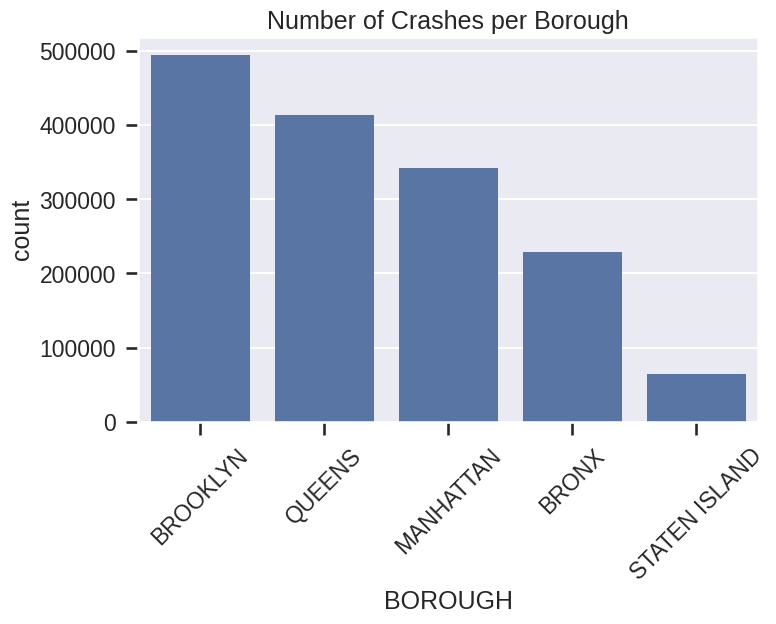

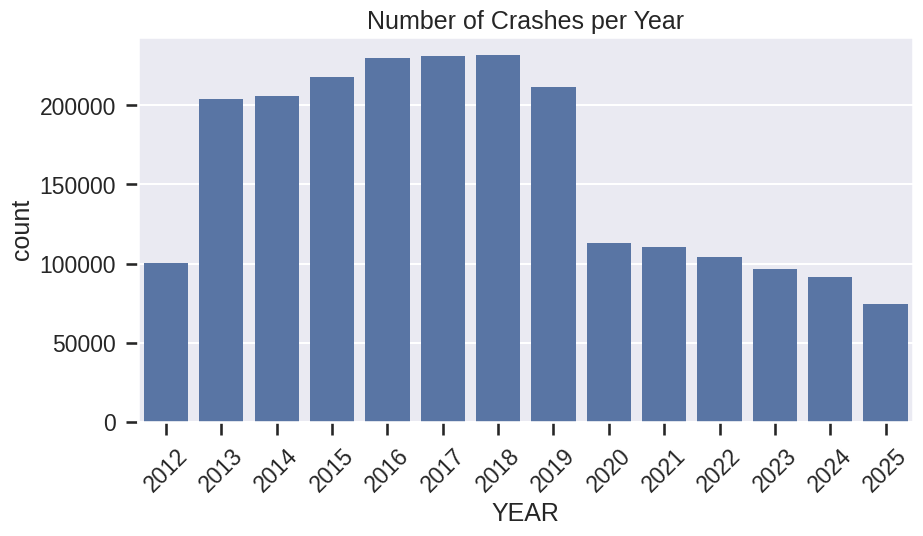

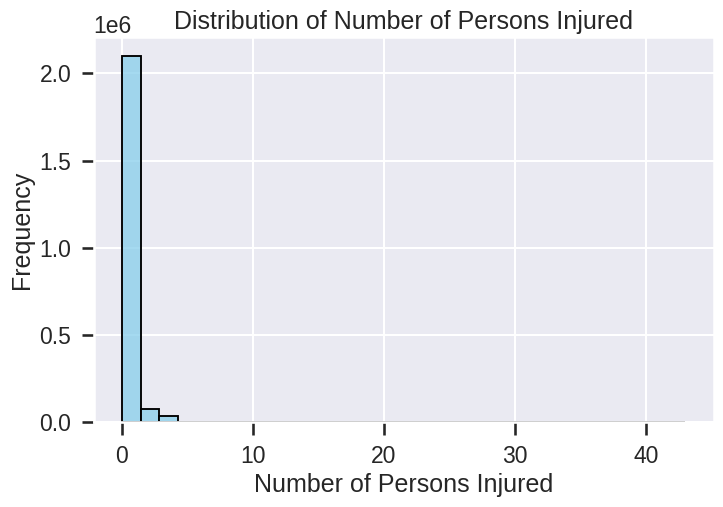

In [7]:
# Step 6: Initial Plots / Trends

# Example 1: Number of crashes per Borough
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_crashes, x='BOROUGH', order=df_crashes['BOROUGH'].value_counts().index)
plt.title('Number of Crashes per Borough')
plt.xticks(rotation=45)
plt.show()

# Example 2: Crashes per Year
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce') # Corrected column name
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df_crashes, x='YEAR', order=sorted(df_crashes['YEAR'].dropna().unique()))
plt.title('Number of Crashes per Year')
plt.xticks(rotation=45)
plt.show()

# Example 3: Distribution of Number of Persons Injured (detecting outliers)
plt.figure(figsize=(8,5))
sns.histplot(df_crashes['NUMBER OF PERSONS INJURED'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Persons Injured')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()


# Step 7: Observations & Notes

- **Dataset size:** Crashes (2,220,126 rows, 29 columns), Persons (5,818,844 rows, 21 columns)  
- **Missing values:** Some columns have many missing values (e.g., in `df_crashes`: BOROUGH (30%), ZIP CODE (30%), CONTRIBUTING FACTOR VEHICLE 3/4/5 (92-99%), VEHICLE TYPE CODE 3/4/5 (93-99%); in `df_persons`: CONTRIBUTING_FACTOR_1/2 (~98%), PED_ACTION/LOCATION (~98%), SAFETY_EQUIPMENT (52%), EJECTION (~48%), PERSON_AGE (11%)).  
- **Duplicates:** Minimal duplicates (0 in both datasets according to Step 5)  
- **Data types:** Dates need conversion to `datetime` (already done for `df_crashes['CRASH DATE']` in Step 6); some numeric columns have suspicious values (e.g., `PERSON_AGE` in `df_persons` has a min of -999, max of 9999).  

- **Initial trends / outliers:** Crashes concentrated in Brooklyn and Queens; the percentage of crashes with 0 persons injured is high (75.77%), but there are crashes with up to 43 injured persons, indicating potential outliers.

Next step: **Pre-integration cleaning** — handle missing values, duplicates, outliers, and standardize formats.

In [8]:
# ===============================
# Step 1: Clean Crashes Dataset
# ===============================

print("df_crashes shape before cleaning (Step 1):", df_crashes.shape)
initial_rows_crashes = df_crashes.shape[0]

# 1. Remove invalid coordinates (0,0 or missing)
# Calculate rows to be dropped first
invalid_coords_rows_before = df_crashes.shape[0]
df_crashes = df_crashes[(df_crashes["LATITUDE"] != 0) & (df_crashes["LONGITUDE"] != 0)]
df_crashes = df_crashes.dropna(subset=["LATITUDE", "LONGITUDE"])
invalid_coords_rows_after = df_crashes.shape[0]
print(f"  - Rows removed due to invalid/missing coordinates: {invalid_coords_rows_before - invalid_coords_rows_after}")

# 2. Drop rows missing key location fields
location_rows_before = df_crashes.shape[0]
df_crashes = df_crashes.dropna(subset=["ZIP CODE", "BOROUGH"])
location_rows_after = df_crashes.shape[0]
print(f"  - Rows removed due to missing ZIP Code/Borough: {location_rows_before - location_rows_after}")

# 3. Drop columns with extremely high missing values (>95%)
cols_to_drop = [
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]
# Filter out columns that might have already been dropped in a previous run
existing_cols_to_drop = [col for col in cols_to_drop if col in df_crashes.columns]
df_crashes = df_crashes.drop(columns=existing_cols_to_drop, errors="ignore")
print(f"  - Columns dropped due to high missing values: {existing_cols_to_drop}")

# 4. Fill street names with 'Unknown'
for col in ["ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME"]:
    if col in df_crashes.columns:
        original_nan_count = df_crashes[col].isna().sum()
        df_crashes[col] = df_crashes[col].fillna("Unknown")
        print(f"  - Filled {original_nan_count} missing values in '{col}' with 'Unknown'")

print("df_crashes shape after cleaning (Step 1):", df_crashes.shape)
print(f"Total rows removed in Step 1: {initial_rows_crashes - df_crashes.shape[0]}")

df_crashes shape before cleaning (Step 1): (2221796, 30)
  - Rows removed due to invalid/missing coordinates: 246917
  - Rows removed due to missing ZIP Code/Borough: 476956
  - Columns dropped due to high missing values: ['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']
  - Filled 345362 missing values in 'ON STREET NAME' with 'Unknown'
  - Filled 345912 missing values in 'CROSS STREET NAME' with 'Unknown'
  - Filled 1153113 missing values in 'OFF STREET NAME' with 'Unknown'
df_crashes shape after cleaning (Step 1): (1497923, 24)
Total rows removed in Step 1: 723873


### Step 1 — Clean Missing Values (Crashes)
- Removed rows with invalid or missing coordinates.  
- Dropped rows missing Borough/ZIP since they cannot be imputed reliably.  
- Removed vehicle-related columns with ~95–99% missing values.  
- Filled missing street names with "Unknown".  


In [9]:
# ===============================
# Step 2: Clean Persons Dataset
# ===============================

print("df_persons shape before cleaning (Step 2):", df_persons.shape)
initial_rows_persons = df_persons.shape[0]

# 1. Keep valid ages only
age_rows_before = df_persons.shape[0]
df_persons = df_persons[(df_persons["PERSON_AGE"] >= 0) & (df_persons["PERSON_AGE"] <= 110)]
age_rows_after = df_persons.shape[0]
print(f"  - Rows removed due to unrealistic PERSON_AGE: {age_rows_before - age_rows_after}")

# 2. Fill missing gender
original_nan_gender_count = df_persons["PERSON_SEX"].isna().sum()
df_persons["PERSON_SEX"] = df_persons["PERSON_SEX"].fillna("Unknown")
print(f"  - Filled {original_nan_gender_count} missing values in 'PERSON_SEX' with 'Unknown'")

# 3. Drop columns with very high missing values
cols_to_drop_persons = ["CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2", "PED_ACTION", "PED_LOCATION", "CRASH_DATE", "CRASH_TIME"]
existing_cols_to_drop_persons = [col for col in cols_to_drop_persons if col in df_persons.columns]
df_persons = df_persons.drop(columns=existing_cols_to_drop_persons, errors="ignore")
print(f"  - Columns dropped due to high missing values in persons dataset: {existing_cols_to_drop_persons}")

# 4. Standardize categorical formatting
print("  - Standardizing 'PERSON_TYPE' and 'PERSON_INJURY' to uppercase and stripped")
df_persons["PERSON_TYPE"] = df_persons["PERSON_TYPE"].astype(str).str.upper().str.strip()
df_persons["PERSON_INJURY"] = df_persons["PERSON_INJURY"].astype(str).str.upper().str.strip()

print("df_persons shape after cleaning (Step 2):", df_persons.shape)
print(f"Total rows removed in Step 2: {initial_rows_persons - df_persons.shape[0]}")

df_persons shape before cleaning (Step 2): (5824319, 21)
  - Rows removed due to unrealistic PERSON_AGE: 655863
  - Filled 331236 missing values in 'PERSON_SEX' with 'Unknown'
  - Columns dropped due to high missing values in persons dataset: ['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PED_ACTION', 'PED_LOCATION', 'CRASH_DATE', 'CRASH_TIME']
  - Standardizing 'PERSON_TYPE' and 'PERSON_INJURY' to uppercase and stripped
df_persons shape after cleaning (Step 2): (5168456, 15)
Total rows removed in Step 2: 655863


### Step 2 — Clean Missing Values (Persons)
- Removed unrealistic ages.  
- Filled missing gender values.  
- Dropped columns with extremely high missing percentages.  
- Cleaned and standardized main categorical fields.  


In [10]:
# ===============================
# Step 3: Remove Duplicates
# ===============================

# Crashes dataset duplicates
print("df_crashes shape before duplicate removal:", df_crashes.shape)
duplicates_crashes_count = df_crashes.duplicated().sum()
df_crashes.drop_duplicates(inplace=True)
print(f"  - Number of duplicate rows removed from df_crashes: {duplicates_crashes_count}")
print("df_crashes shape after duplicate removal:", df_crashes.shape)

# Persons dataset duplicates
print("\ndf_persons shape before duplicate removal:", df_persons.shape)
duplicates_persons_count = df_persons.duplicated().sum()
df_persons.drop_duplicates(inplace=True)
print(f"  - Number of duplicate rows removed from df_persons: {duplicates_persons_count}")
print("df_persons shape after duplicate removal:", df_persons.shape)

df_crashes shape before duplicate removal: (1497923, 24)
  - Number of duplicate rows removed from df_crashes: 0
df_crashes shape after duplicate removal: (1497923, 24)

df_persons shape before duplicate removal: (5168456, 15)
  - Number of duplicate rows removed from df_persons: 0
df_persons shape after duplicate removal: (5168456, 15)


### Step 3 — Remove Duplicates
Dropped duplicate rows from both datasets to avoid repeated crash/person entries.
But there is no Duplicates


In [11]:
# ===============================
# Step 4: Standardize datetime
# ===============================

print("df_crashes 'CRASH DATE' dtype before conversion:", df_crashes['CRASH DATE'].dtype)
print("df_crashes 'CRASH TIME' dtype before conversion:", df_crashes['CRASH TIME'].dtype)
df_crashes["CRASH DATE"] = pd.to_datetime(df_crashes["CRASH DATE"], errors="coerce")
df_crashes["CRASH TIME"] = pd.to_datetime(df_crashes["CRASH TIME"], format="%H:%M", errors="coerce")
print("df_crashes 'CRASH DATE' dtype after conversion:", df_crashes['CRASH DATE'].dtype)
print("df_crashes 'CRASH TIME' dtype after conversion:", df_crashes['CRASH TIME'].dtype)
print("  - Converted 'CRASH DATE' and 'CRASH TIME' columns to datetime objects.")

df_crashes 'CRASH DATE' dtype before conversion: datetime64[ns]
df_crashes 'CRASH TIME' dtype before conversion: object
df_crashes 'CRASH DATE' dtype after conversion: datetime64[ns]
df_crashes 'CRASH TIME' dtype after conversion: datetime64[ns]
  - Converted 'CRASH DATE' and 'CRASH TIME' columns to datetime objects.


### Step 4 — Standardize Formats
Converted crash dates and times into proper datetime formats for later analysis.


In [12]:
# ===============================
# Step 5: Outlier Detection and Handling
# ===============================

# --- Outliers in Crashes Dataset ---
# Focus on 'NUMBER OF PERSONS INJURED'
Q1_injured = df_crashes['NUMBER OF PERSONS INJURED'].quantile(0.25)
Q3_injured = df_crashes['NUMBER OF PERSONS INJURED'].quantile(0.75)
IQR_injured = Q3_injured - Q1_injured

# Define bounds for 'NUMBER OF PERSONS INJURED'
# Lower bound should not be negative as number of persons cannot be negative
lower_bound_injured = max(0, Q1_injured - 1.5 * IQR_injured)
upper_bound_injured = Q3_injured + 1.5 * IQR_injured

# Filter out outliers for 'NUMBER OF PERSONS INJURED'
df_crashes = df_crashes[
    (df_crashes['NUMBER OF PERSONS INJURED'] >= lower_bound_injured) &
    (df_crashes['NUMBER OF PERSONS INJURED'] <= upper_bound_injured)
]

# --- Outliers in Persons Dataset ---
# Focus on 'PERSON_AGE'
# Ensure 'PERSON_AGE' is numeric and handle NaNs if any before IQR calculation
df_persons['PERSON_AGE'] = pd.to_numeric(df_persons['PERSON_AGE'], errors='coerce')
df_persons_temp = df_persons.dropna(subset=['PERSON_AGE'])

Q1_age = df_persons_temp['PERSON_AGE'].quantile(0.25)
Q3_age = df_persons_temp['PERSON_AGE'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define bounds for 'PERSON_AGE'
# Lower bound should not be negative as age cannot be negative
lower_bound_age = max(0, Q1_age - 1.5 * IQR_age)
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out outliers for 'PERSON_AGE'
df_persons = df_persons[
    (df_persons['PERSON_AGE'] >= lower_bound_age) &
    (df_persons['PERSON_AGE'] <= upper_bound_age)
]

print("df_crashes shape after outlier removal (injured persons):", df_crashes.shape)
print("df_persons shape after outlier removal (person age):", df_persons.shape)


df_crashes shape after outlier removal (injured persons): (1142076, 24)
df_persons shape after outlier removal (person age): (5164712, 15)


In [13]:
missing_crashes = df_crashes.isna().sum()
missing_crashes_percent = (missing_crashes / len(df_crashes) * 100)
missing_crashes_df = pd.concat([missing_crashes, missing_crashes_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_crashes_df_sorted = missing_crashes_df.sort_values(by='Missing Count', ascending=False)
print("Top 20 missing values in crashes dataset (count and %):")
display(missing_crashes_df_sorted.head(20))

# Persons dataset
missing_persons = df_persons.isna().sum()
missing_persons_percent = (missing_persons / len(df_persons) * 100)
missing_persons_df = pd.concat([missing_persons, missing_persons_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_persons_df_sorted = missing_persons_df.sort_values(by='Missing Count', ascending=False)
print("\nTop 20 missing values in persons dataset (count and %):")
display(missing_persons_df_sorted.head(20))

Top 20 missing values in crashes dataset (count and %):


,Missing Count,Missing %
VEHICLE TYPE CODE 2,193707,16.960955
CONTRIBUTING FACTOR VEHICLE 2,139647,12.227470
VEHICLE TYPE CODE 1,3670,0.321345
CONTRIBUTING FACTOR VEHICLE 1,2111,0.184839
NUMBER OF PERSONS KILLED,5,0.000438
CRASH DATE,0,0.000000
BOROUGH,0,0.000000
CRASH TIME,0,0.000000
ON STREET NAME,0,0.000000
LOCATION,0,0.000000



Top 20 missing values in persons dataset (count and %):


,Missing Count,Missing %
SAFETY_EQUIPMENT,2410173,46.666165
EJECTION,2210754,42.804981
POSITION_IN_VEHICLE,2210318,42.796539
EMOTIONAL_STATUS,2115962,40.969603
BODILY_INJURY,2115917,40.968732
COMPLAINT,2115912,40.968635
PED_ROLE,194587,3.767625
VEHICLE_ID,144632,2.800388
PERSON_ID,19,0.000368
PERSON_AGE,0,0.000000


### Step 5 — Outlier Detection and Handling
Applied the Interquartile Range (IQR) method to detect and remove outliers from 'NUMBER OF PERSONS INJURED' in the crashes dataset and 'PERSON_AGE' in the persons dataset. This helps in refining the datasets by removing extreme values that might skew analysis.

From this point , the code is continued by Aly Waleed, this part includes the integration and post-integration cleaning

###  Step 1 :Joining crashes data set with persons datset via collision_ID

In [14]:
#Standardize the join key in both datasets
df_crashes['COLLISION_ID'] = df_crashes['COLLISION_ID'].astype(str)
df_persons['COLLISION_ID'] = df_persons['COLLISION_ID'].astype(str)

#Perform LEFT JOIN (keep all collisions, add person info)
df_joined = df_crashes.merge(df_persons, on='COLLISION_ID', how='left')

print("Joined shape:", df_joined.shape)
df_joined.head()


Joined shape: (2567575, 38)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,20060293.0,28.0,Not Ejected,Does Not Apply,Does Not Apply,Unknown,NaN,Does Not Apply,Driver,F
1,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,20060293.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,F
2,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,Unknown,...,NaN,46.0,NaN,Does Not Apply,Does Not Apply,NaN,NaN,Does Not Apply,Pedestrian,M
3,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",Unknown,Unknown,2047 PITKIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,Unknown,...,20126568.0,37.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,Does Not Apply,Driver,M


### Step 2: Filling the missing values from the join

In [15]:
# Fill categorical missing values created by the join
categorical_cols = ['PERSON_TYPE', 'PERSON_INJURY', 'POSITION_IN_VEHICLE',
                    'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
                    'PED_ROLE', 'PED_LOCATION', 'PERSON_SEX']

for col in categorical_cols:
    if col in df_joined.columns:
        df_joined[col] = df_joined[col].fillna('Unknown')

### Justification for Filling Categorical Missing Values with “Unknown”

1.Preventing unnecessary row deletion

Many collisions have incomplete person-level information due to reporting gaps.

Dropping rows with missing categorical fields would remove valid collisions and bias the dataset.

2.In safety data, missing information is rarely random.
For example, EJECTION or BODILY_INJURY may be missing because the individual was uninjured

3.many algorithms cannot handle NaN , so we replace it with unknown to make the data easier to work with

### Step 3 : Handling data type mismatches

In [16]:
# Convert date/time columns
if 'CRASH_DATE' in df_joined.columns:
    df_joined['CRASH_DATE'] = pd.to_datetime(df_joined['CRASH_DATE'], errors='coerce')

if 'CRASH_TIME' in df_joined.columns:
    df_joined['CRASH_TIME'] = pd.to_datetime(df_joined['CRASH_TIME'], format='%H:%M', errors='coerce')

# Convert numeric columns
numeric_cols = ['PERSON_AGE', 'LATITUDE', 'LONGITUDE']

for col in numeric_cols:
    if col in df_joined.columns:
        df_joined[col] = pd.to_numeric(df_joined[col], errors='coerce')


### Justification for Fixing Data Types

1.Datetime conversion ensures temporal consistency

2.Numeric conversion prevents analytic errors

3.Prevents type-based bugs in models

### Step 4: Dropping redundant columns

In [17]:
columns_to_drop = ['UNIQUE_ID', 'PED_ROLE', 'ZIP CODE']

df_joined = df_joined.drop(columns=[c for c in columns_to_drop if c in df_joined.columns])

### Justification for Dropping Redundant Columns

1.UNIQUE_ID often provides no analytic value, this is an id used by data publishers , it often duplicate COLLISION_ID , so it is best to drop it

2.PED_ROLE is inconsistent and frequently missing,This field is usually sparsely filled and often overlaps with other better-quality fields like PERSON_TYPE.

### Step 6: Standardize Vehicle Type Names

In [18]:
# Define a standardization function
def standardize_vehicle_type(df, column):
    if column in df.columns:
        # Convert to string and then to uppercase to handle mixed types and capitalization
        df[column] = df[column].astype(str).str.upper().str.strip()

        # Define mapping for common variations. Added more comprehensive mappings.
        # The key is the variation, the value is the standardized form.
        type_mapping = {
            'AMULANCE': 'AMBULANCE',
            'AMBULETTE': 'AMBULANCE',
            'AMBULANE': 'AMBULANCE',
            'AMBALANCE': 'AMBULANCE',
            'AMB': 'AMBULANCE',
            'AMBU': 'AMBULANCE',
            'ABMU': 'AMBULANCE',
            'AMBUL': 'AMBULANCE',
            'AMBULENCE': 'AMBULANCE',
            'PASSENGER VEHICLE': 'PASSENGER VEHICLE',
            'SPORT UTILITY / STATION WAGON': 'SUV',
            'SPORT UTILITY VEHICLE': 'SUV',
            'BICYC': 'BICYCLE',
            'BOX T': 'BOX TRUCK',
            'BOOM': 'BOOM LIFT',
            'BOBCAT': 'BOBCAT FORKLIFT',
            'BOBCAT FOR': 'BOBCAT FORKLIFT',
            'BUCKE': 'BUCKET TRUCK',
            'UNKNOWN': 'UNKNOWN',
            'NAN': 'UNKNOWN',
            'CAR': 'PASSENGER VEHICLE',
            'SEDAN': 'PASSENGER VEHICLE',
            'AUTO': 'PASSENGER VEHICLE',
            'TAXI': 'TAXI',
            'CAB': 'TAXI',
            'TRK': 'TRUCK',
            'TRUCK': 'TRUCK',
            'BUS': 'BUS',
            'SCHOOL BUS': 'SCHOOL BUS',
            'MOTORCY': 'MOTORCYCLE',
            'MOTORCYCLE': 'MOTORCYCLE',
            'VAN': 'VAN',
            'COMMERCIAL VAN': 'VAN',
            'P-UP': 'PICKUP TRUCK',
            'PICKUP': 'PICKUP TRUCK',
            'LIMO': 'LIMOUSINE',
            'LIMOUSINE': 'LIMOUSINE',
            'FIRE TRUCK': 'FIRE TRUCK',
            'FIRE ENGINE': 'FIRE TRUCK',
            'FORK LIFT': 'FORKLIFT',
            'FORKLIFT': 'FORKLIFT',
            'TOW TRUCK': 'TOW TRUCK',
            'TOWING': 'TOW TRUCK',
            'REFRIGERATED VAN': 'REFRIGERATED VAN',
            'COMMERCIAL VEH': 'COMMERCIAL VEHICLE',
            'COMMERCIAL': 'COMMERCIAL VEHICLE',
            'MOPED': 'MOPED/SCOOTER',
            'SCOOTER': 'MOPED/SCOOTER',
            'E-BIKE': 'ELECTRIC BICYCLE',
            'ELECTRIC BIKE': 'ELECTRIC BICYCLE',
            'E-SCOOTER': 'ELECTRIC SCOOTER',
            'ELECTRIC SCOOTER': 'ELECTRIC SCOOTER',
            'SCOOTER': 'MOPED/SCOOTER',
            '3-WHEEL SCOOTER': 'MOPED/SCOOTER',
            'TRACTOR TRUCK DIES': 'TRACTOR TRUCK',
            'TRACTOR TRUCK': 'TRACTOR TRUCK',
            'FLAT BED': 'FLATBED TRUCK',
            'FLATBED': 'FLATBED TRUCK',
            'GARBAGE TRUCK': 'GARBAGE TRUCK',
            'SNOW PLOW': 'SNOW PLOW',
            'CONCRETE MIXER': 'CONCRETE MIXER',
            'UTIL': 'UTILITY VEHICLE',
            'UTILITY': 'UTILITY VEHICLE',
            '12 PA': '12 PASSENGER',
            '12 PASSENG': '12 PASSENGER',
            '4DS': '4 DR SEDAN',
            'UNKNOW': 'UNKNOWN',
            'UNMARKED V': 'VAN',
            'MARKED VAN': 'VAN',
            'UNKWOWN': 'UNKNOWN',
            'UPS': 'UPS TRUCK',
            'USPOS': 'UPS TRUCK',
            'UPS T': 'UPS TRUCK',
            'US MAIL #1': 'UPS TRUCK',
            'US MAIL TR': 'UPS TRUCK',
            'US PO': 'UPS TRUCK',
            'USP M': 'UPS TRUCK',
            'US POSTA': 'UPS TRUCK',
            'USPS': 'UPS TRUCK',
            'USPCS': 'UPS TRUCK',
            'USPS #6530': 'UPS TRUCK',
            'USPS #7530': 'UPS TRUCK',
            'USPS MAIL': 'UPS TRUCK',
            'USPS POSTA': 'UPS TRUCK',
            'USPS/GOVT': 'UPS TRUCK',
            'USPS2': 'UPS TRUCK',
            'UTILI': 'UTILITY VEHICLE',
            'UT': 'UTILITY VEHICLE',
            'UTILITY TR': 'UTILITY VEHICLE',
            'VA': 'VAN',
            'VAN (TRANS': 'VAN',
            'VAN CAMPER': 'VAN',
            'VAN T': 'VAN',
            'VAN TRUCK': 'VAN',
            'VAN WH': 'VAN',
            'VANETTE': 'VAN',
            'VAN/TRUCK': 'VAN',
            'VAV': 'VAN',
            'VMS': 'VAN',
            'WASTE TRUC': 'WASTE TRUCK',
            'WH FORD CO': 'PASSENGER VEHICLE',
            'WHITE AMBU': 'AMBULANCE',
            'WORK': 'WORK VEHICLE',
            'WORK VAN': 'WORK VEHICLE',
            'WASTE TRUCk': 'WORK VEHICLE',
            'WORKH': 'WORK VEHICLE',
            'PARCEL VAN': 'PARCEL DELIVERY VAN',
            'YELLO': 'UNKNOWN',
            'YELLOPOWE': 'UNKNOWN',
            'TRAILER/FL': 'TRAILER',
            'TRL': 'TRAILER',
            'TLR': 'TRAILER',
            'TR-TRAILER': 'TRAILER',
            'TRLR': 'TRAILER',
            'TTAILER': 'TRAILER',
            'TRANSPORTE': 'TRANSIT',
            'TRANSIT VA': 'TRANSIT',
            'TRUCK COMM': 'TRUCK',
            'UHAL': 'UHAUL',
            'U-HAUL': 'UHAUL',
            'U HAUL TRU': 'UHAUL',
            'U HAUL TRUCK': 'UHAUL',
            'U HAUL TRUC': 'UHAUL',
            'U-HAUL MIN': 'UHAUL',
            'U-HAUL TRU': 'UHAUL',
            'NYS A': 'AMBULANCE',
            'NYS AMBULA': 'AMBULANCE',
            'NYFD AMBUL': 'AMBULANCE',
            'NYC AMBULA': 'AMBULANCE',
            'NISSA': 'PASSENGER VEHICLE',
            'NYC D': 'NYPD',
            'NYCHA': 'NYPD',
            'UHUAL': 'UHAUL',
            'UNK': 'UNKNOWN',
            'UNKN': 'UNKNOWN',
            'UNKNO': 'UNKNOWN',
            'UNKOW': 'UNKNOWN',
            'UNKN': 'UNKNOWN',
            'UNKWOWN VE': 'UNKNOWN',
            'TRACT': 'TRACTOR TRUCK',
            'TRAC': 'TRACTOR TRUCK',
            'TR': 'TRACTOR TRUCK',
            'TRACK EXCA': 'TRACTOR TRUCK',
            'TRACTOR': 'TRACTOR TRUCK',
            'TOWER': 'TOW TRUCK',
            'TOWTR': 'TOW TRUCK',
            'TOW-TRUCK': 'TOW TRUCK',
            'TOW': 'TOW TRUCK',
            'TOWTR': 'TOW TRUCK',
            'TOW T': 'TOW TRUCK',
            'TOW TRUCK / WRECKER': 'TOW TRUCK',
            'RECKER': 'TOW TRUCK',
            'TE': 'TAXI',
            'TK': 'TOW TRUCK',
            'TIR': 'TOW TRUCK',
            'TLC': 'TOW TRUCK',
            'PK': 'PICKUP TRUCK',
            'P-UP TRK': 'PICKUP TRUCK',
            'CONCRET': 'CONCRETE MIXER',
            'MIXER': 'CONCRETE MIXER',
            'EXCAVATOR': 'CONSTRUCTION EQUIPMENT',
            'BACKHOE': 'CONSTRUCTION EQUIPMENT',
            'FORKLIFT': 'FORKLIFT',
            'MOTOR SCOOTER': 'MOPED/SCOOTER',
            'EBIKE': 'ELECTRIC BICYCLE',
            'E SCOOTER': 'ELECTRIC SCOOTER',
            'COMMERC': 'COMMERCIAL VEHICLE',
            'COM VEH': 'COMMERCIAL VEHICLE',
            'LUXURY': 'PASSENGER VEHICLE',
            'ROADSTER': 'PASSENGER VEHICLE',
            'COUPE': 'PASSENGER VEHICLE',
            'SPORTS CAR': 'PASSENGER VEHICLE',
            'WAGON': 'SUV',
            'UTILITY V': 'UTILITY VEHICLE',
            'DUMP TRUCK': 'DUMP TRUCK',
            'TANKER': 'TANKER TRUCK',
            'CEMENT MIXER': 'CONCRETE MIXER',
            'GARBAGE': 'GARBAGE TRUCK',
            'RECYCLING TRUCK': 'GARBAGE TRUCK',
            'BUS SCHOOL': 'SCHOOL BUS',
            'MINI BUS': 'BUS',
            'PASSENGER': 'PASSENGER VEHICLE',
            'PASSENGER V': 'PASSENGER VEHICLE',
            'PASSENGER CAR': 'PASSENGER VEHICLE',
            'SEMI': 'TRACTOR TRUCK',
            'TRAC TRUCK': 'TRACTOR TRUCK',
            'TRACTOR-TRL': 'TRACTOR TRUCK',
            'FIRE VEHICLE': 'FIRE TRUCK',
            'AMBULANCE/EMS': 'AMBULANCE',
            'CONVERTIBLE': 'PASSENGER VEHICLE',
            'PICK UP TRUCK': 'PICKUP TRUCK',
            'FLATBED TRUCK': 'FLATBED TRUCK',
            'VAN - CONVERTIBLE': 'VAN'
        }

        # Apply mapping
        df[column] = df[column].replace(type_mapping)

        # Replace purely numeric strings with 'UNKNOWN'
        df[column] = df[column].apply(lambda x: 'UNKNOWN' if isinstance(x, str) and x.isdigit() else x)

        print(f"  - Standardized '{column}' variations and capitalization, and handled numeric entries.")

    else:
        print(f"Column '{column}' not found in DataFrame.")

# Apply standardization to both vehicle type columns
standardize_vehicle_type(df_joined, 'VEHICLE TYPE CODE 1')
standardize_vehicle_type(df_joined, 'VEHICLE TYPE CODE 2')

print("\nUnique values in 'VEHICLE TYPE CODE 1' after standardization:")
display(df_joined['VEHICLE TYPE CODE 1'].value_counts().head(64))

print("\nUnique values in 'VEHICLE TYPE CODE 2' after standardization:")
display(df_joined['VEHICLE TYPE CODE 2'].value_counts().head(64))

  - Standardized 'VEHICLE TYPE CODE 1' variations and capitalization, and handled numeric entries.
  - Standardized 'VEHICLE TYPE CODE 2' variations and capitalization, and handled numeric entries.

Unique values in 'VEHICLE TYPE CODE 1' after standardization:


,count
VEHICLE TYPE CODE 1,
PASSENGER VEHICLE,1199566
STATION WAGON/SPORT UTILITY VEHICLE,738588
SUV,109300
TAXI,106638
BUS,70492
...,...
FDNY AMBUL,128
COMME,127
BICYCLE,126



Unique values in 'VEHICLE TYPE CODE 2' after standardization:


,count
VEHICLE TYPE CODE 2,
PASSENGER VEHICLE,985796
STATION WAGON/SPORT UTILITY VEHICLE,626735
UNKNOWN,353439
TAXI,98494
SUV,89627
...,...
MULTI-WHEELED VEHICLE,174
FIRET,173
BULK AGRICULTURE,166


In [19]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [20]:
from fuzzywuzzy import process

def fuzzy_standardize_vehicle_type(df, column, canonical_types, threshold=80):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return df

    # Ensure the column is string type and uppercase for consistent matching
    df[column] = df[column].astype(str).str.upper().str.strip()

    # Create a mapping dictionary for non-canonical types
    standardized_mapping = {}
    unique_non_canonical = df[column].unique()

    # Convert canonical_types to uppercase for matching consistency
    canonical_types_upper = [c.upper() for c in canonical_types]

    print(f"Generating fuzzy mapping for '{column}'...")
    for entry in unique_non_canonical:
        if entry in canonical_types_upper or entry == 'UNKNOWN': # Already canonical or unknown
            standardized_mapping[entry] = entry
        else:
            # Find the best match among canonical types
            best_match, score = process.extractOne(entry, canonical_types_upper)
            if score >= threshold:
                standardized_mapping[entry] = best_match
            else:
                standardized_mapping[entry] = entry # Keep original if no good match

    print(f"Applying fuzzy mapping to '{column}'...")
    df[column] = df[column].map(standardized_mapping)
    print(f"Fuzzy standardization applied to '{column}'.")
    return df

# Define a more comprehensive list of canonical vehicle types
# This list can be expanded or refined based on domain knowledge
canonical_vehicle_types = [
    'PASSENGER VEHICLE', 'SUV', 'TAXI', 'TRUCK', 'BUS', 'SCHOOL BUS',
    'MOTORCYCLE', 'VAN', 'PICKUP TRUCK', 'LIMOUSINE', 'AMBULANCE',
    'FIRE TRUCK', 'FORKLIFT', 'TOW TRUCK', 'REFRIGERATED VAN',
    'COMMERCIAL VEHICLE', 'MOPED/SCOOTER', 'ELECTRIC BICYCLE',
    'ELECTRIC SCOOTER', 'TRACTOR TRUCK', 'FLATBED TRUCK', 'GARBAGE TRUCK',
    'SNOW PLOW', 'CONCRETE MIXER', 'UTILITY VEHICLE', 'UNKNOWN',
    '12 PASSENGER', 'CONSTRUCTION EQUIPMENT', 'UHAUL', 'WASTE TRUCK',
    'TRAILER', 'TRANSIT', 'NYPD', 'PARCEL DELIVERY VAN',
    # Additional canonical types based on observations from previous output
    'UPS TRUCK',          # To better match variations like 'POSTA', 'USPS'
    'TANKER TRUCK',       # To match 'TANK'
    'STREET SWEEPER'      # To match 'STREE'
]

# Apply the fuzzy standardization to both vehicle type columns
df_joined = fuzzy_standardize_vehicle_type(df_joined.copy(), 'VEHICLE TYPE CODE 1', canonical_vehicle_types)
df_joined = fuzzy_standardize_vehicle_type(df_joined.copy(), 'VEHICLE TYPE CODE 2', canonical_vehicle_types)

print("\nUnique values in 'VEHICLE TYPE CODE 1' after fuzzy standardization:")
display(df_joined['VEHICLE TYPE CODE 1'].value_counts().head(30))

print("\nUnique values in 'VEHICLE TYPE CODE 2' after fuzzy standardization:")
display(df_joined['VEHICLE TYPE CODE 2'].value_counts().head(30))

Generating fuzzy mapping for 'VEHICLE TYPE CODE 1'...
Applying fuzzy mapping to 'VEHICLE TYPE CODE 1'...
Fuzzy standardization applied to 'VEHICLE TYPE CODE 1'.
Generating fuzzy mapping for 'VEHICLE TYPE CODE 2'...
Applying fuzzy mapping to 'VEHICLE TYPE CODE 2'...
Fuzzy standardization applied to 'VEHICLE TYPE CODE 2'.

Unique values in 'VEHICLE TYPE CODE 1' after fuzzy standardization:


,count
VEHICLE TYPE CODE 1,
PASSENGER VEHICLE,1199678
UTILITY VEHICLE,738885
SUV,109302
TAXI,106640
PICKUP TRUCK,71257
BUS,70581
TRUCK,62438
4 DR SEDAN,47014
VAN,34944



Unique values in 'VEHICLE TYPE CODE 2' after fuzzy standardization:


,count
VEHICLE TYPE CODE 2,
PASSENGER VEHICLE,985898
UTILITY VEHICLE,626972
UNKNOWN,353466
TAXI,98494
SUV,89632
TRUCK,73225
PICKUP TRUCK,71703
BUS,64065
4 DR SEDAN,40432


In [21]:
print("Number of duplicate rows in joined dataset:", df_joined.duplicated().sum())

Number of duplicate rows in joined dataset: 0


In [22]:
print("df_joined shape before duplicate removal:", df_joined.shape)
duplicates_joined_count = df_joined.duplicated().sum()
df_joined.drop_duplicates(inplace=True)
print(f"  - Number of duplicate rows removed from df_joined: {duplicates_joined_count}")
print("df_joined shape after duplicate removal:", df_joined.shape)

df_joined shape before duplicate removal: (2567575, 35)
  - Number of duplicate rows removed from df_joined: 0
df_joined shape after duplicate removal: (2567575, 35)


In [23]:
print("df_joined info with deep memory usage:\n")
df_joined.info(memory_usage='deep')

print("\nMemory usage per column (MB):\n")
column_memory_mb = df_joined.memory_usage(deep=True) / (1024**2)
print(column_memory_mb.sort_values(ascending=False))

total_memory_mb = df_joined.memory_usage(deep=True).sum() / (1024**2)
print(f"\nTotal memory usage of df_joined: {total_memory_mb:.2f} MB")

df_joined info with deep memory usage:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567575 entries, 0 to 2567574
Data columns (total 35 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED  

In [24]:
initial_memory_usage = df_joined.memory_usage(deep=True).sum()

# Convert suitable object columns to 'category' dtype
categorical_cols_to_optimize = [
    'BOROUGH', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
    'PERSON_SEX', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
    'COMPLAINT', 'SAFETY_EQUIPMENT', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2'
]

for col in categorical_cols_to_optimize:
    if col in df_joined.columns:
        df_joined[col] = df_joined[col].astype('category')

print("Converted object columns to 'category' data type.")

# Display memory usage after categorical conversion
print("\nMemory usage per column after categorical conversion (MB):\n")
column_memory_mb_after_cat = df_joined.memory_usage(deep=True) / (1024**2)
print(column_memory_mb_after_cat.sort_values(ascending=False))

total_memory_mb_after_cat = df_joined.memory_usage(deep=True).sum() / (1024**2)
print(f"\nTotal memory usage after categorical conversion: {total_memory_mb_after_cat:.2f} MB")


Converted object columns to 'category' data type.

Memory usage per column after categorical conversion (MB):

ON STREET NAME                   175.475461
PERSON_ID                        175.001206
LOCATION                         174.593509
OFF STREET NAME                  157.995131
CROSS STREET NAME                155.642259
COLLISION_ID                     136.795732
CRASH TIME                        19.589043
CRASH DATE                        19.589043
VEHICLE_ID                        19.589043
PERSON_AGE                        19.589043
LATITUDE                          19.589043
LONGITUDE                         19.589043
NUMBER OF PEDESTRIANS INJURED     19.589043
NUMBER OF PEDESTRIANS KILLED      19.589043
NUMBER OF CYCLIST INJURED         19.589043
NUMBER OF CYCLIST KILLED          19.589043
NUMBER OF MOTORIST INJURED        19.589043
NUMBER OF MOTORIST KILLED         19.589043
NUMBER OF PERSONS INJURED         19.589043
NUMBER OF PERSONS KILLED          19.589043
YEAR     

In [25]:
print("df_joined shape before numeric and column optimization:", df_joined.shape)

# --- Optimize Numeric Columns ---
# Downcast floats
for col in ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
            'VEHICLE_ID', 'PERSON_AGE']:
    if col in df_joined.columns:
        df_joined[col] = pd.to_numeric(df_joined[col], errors='coerce').astype(np.float32)

# Downcast integers
for col in ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
            'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
            'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'YEAR']:
    if col in df_joined.columns:
        # Convert to float first to handle potential NaNs before converting to int
        df_joined[col] = pd.to_numeric(df_joined[col], errors='coerce')
        # Use pd.Int64Dtype() for nullable integer or astype('int16') after filling NaNs
        # For now, let's keep it simple with direct downcast if no NaNs or fill NaNs before
        # If there are NaNs, astype('int') will fail, need to use Int64Dtype or fillna
        # Based on previous steps, these should ideally not have many NaNs if any, or they've been handled.
        # Let's use `pd.to_numeric` and then `astype('int32')` if possible, and `int16` if range allows.
        # A safer approach for numeric columns is to convert to appropriate nullable types if NaNs exist.

        # For now, assuming no NaNs for these counts, or they will be coerced to float for now if any exist
        # Re-checking dtypes to ensure proper downcasting
        if df_joined[col].dtype == 'int64': # Only try to downcast if current dtype is int64
            df_joined[col] = df_joined[col].astype('int32') # Default to int32


# Convert COLLISION_ID to an efficient integer type
# First, ensure it's numeric, then downcast
df_joined['COLLISION_ID'] = pd.to_numeric(df_joined['COLLISION_ID'], errors='coerce')
# Find the smallest integer type that can hold all values
max_collision_id = df_joined['COLLISION_ID'].max()
if max_collision_id <= np.iinfo(np.int16).max: # np.int16 is typically -32768 to 32767
    df_joined['COLLISION_ID'] = df_joined['COLLISION_ID'].astype(np.int16)
elif max_collision_id <= np.iinfo(np.int32).max:
    df_joined['COLLISION_ID'] = df_joined['COLLISION_ID'].astype(np.int32)
else:
    df_joined['COLLISION_ID'] = df_joined['COLLISION_ID'].astype(np.int64) # Fallback to int64


print("Optimized numeric columns to smaller dtypes.")

# --- Drop Redundant Columns ---
columns_to_drop_final = ['LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'PERSON_ID', 'VEHICLE_ID']

# Filter out columns that don't exist to prevent errors
existing_cols_to_drop_final = [col for col in columns_to_drop_final if col in df_joined.columns]
df_joined = df_joined.drop(columns=existing_cols_to_drop_final, errors='ignore')

print(f"Dropped redundant columns: {existing_cols_to_drop_final}")

print("df_joined shape after numeric and column optimization:", df_joined.shape)

# Calculate and display the memory usage after all optimizations
print(
  "\nMemory usage per column after numeric and column optimization (MB):\n"
)
column_memory_mb_final = df_joined.memory_usage(deep=True) / (1024**2)
print(column_memory_mb_final.sort_values(ascending=False))

total_memory_mb_final = df_joined.memory_usage(deep=True).sum() / (1024**2)
print(f"\nTotal memory usage after all optimizations: {total_memory_mb_final:.2f} MB")

memory_reduction_mb = initial_memory_usage / (1024**2) - total_memory_mb_final
print(f"\nTotal memory reduction achieved: {memory_reduction_mb:.2f} MB")

df_joined shape before numeric and column optimization: (2567575, 35)
Optimized numeric columns to smaller dtypes.
Dropped redundant columns: ['LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'PERSON_ID', 'VEHICLE_ID']
df_joined shape after numeric and column optimization: (2567575, 29)

Memory usage per column after numeric and column optimization (MB):

CRASH DATE                       19.589043
CRASH TIME                       19.589043
LONGITUDE                         9.794521
LATITUDE                          9.794521
NUMBER OF PERSONS KILLED          9.794521
NUMBER OF PERSONS INJURED         9.794521
NUMBER OF CYCLIST INJURED         9.794521
NUMBER OF CYCLIST KILLED          9.794521
NUMBER OF PEDESTRIANS INJURED     9.794521
NUMBER OF PEDESTRIANS KILLED      9.794521
NUMBER OF MOTORIST INJURED        9.794521
NUMBER OF MOTORIST KILLED         9.794521
YEAR                              9.794521
COLLISION_ID                      9.794521
PERSON_AGE         

In [28]:
import os

# 1. Save the df_joined DataFrame to a new CSV file (uncompressed)
output_file_path = "df_joined_optimized.csv"
df_joined.to_csv(output_file_path, index=False)
print(f"Optimized DataFrame saved to '{output_file_path}'")

# 2. Get the size of the newly created CSV file in bytes
# 3. Convert the file size from bytes to megabytes (MB)
if os.path.exists(output_file_path):
    file_size_bytes = os.path.getsize(output_file_path)
    file_size_mb = file_size_bytes / (1024 * 1024)  # Convert to MB
    # 4. Print the size of the df_joined_optimized_uncompressed.csv file in MB
    print(f"The size of '{output_file_path}' is: {file_size_mb:.2f} MB")
else:
    print(f"File '{output_file_path}' not found.")

Optimized DataFrame saved to 'df_joined_optimized.csv'
The size of 'df_joined_optimized.csv' is: 493.13 MB
